# **Viral or Not – Predicting Virality of Tweets**

## Import Required Libraries
This section imports the necessary libraries for data manipulation and visualization.

In [160]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load the Dataset
Load the dataset containing tweets and display the first few rows.

In [161]:
data = pd.read_csv("Dataset/Tweets.csv")

In [162]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Dataset Information
Get an overview of the dataset structure and data types.

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Drop Unnecessary Columns
Remove columns that are not needed for analysis to simplify the dataset.

In [164]:
columns_to_drop = [
    'tweet_id', 
    'airline_sentiment_confidence',  
    'airline_sentiment_gold', 
    'negativereason_gold', 
    'name', 
    'tweet_coord', 
    'tweet_location', 
    'user_timezone'
]

data.drop(columns=columns_to_drop, inplace=True)

## Check Dataset Shape
Display the shape of the dataset to understand its dimensions.

In [165]:
data.shape

(14640, 7)

## Check for Missing Values
Identify any missing values in the dataset.

In [166]:
# Check missing values first
print(data.isnull().sum())

airline_sentiment               0
negativereason               5462
negativereason_confidence    4118
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64


## Fill Missing Values
Fill missing values in the `negativereason` column with 'No Reason'.

In [167]:
# Fill missing values appropriately
data['negativereason'] = data['negativereason'].fillna('none')
data['negativereason_confidence'] = data['negativereason_confidence'].fillna(0)

In [168]:
data.isnull().sum()

airline_sentiment            0
negativereason               0
negativereason_confidence    0
airline                      0
retweet_count                0
text                         0
tweet_created                0
dtype: int64

## Convert Tweet Created to Datetime
Convert the `tweet_created` column to datetime format for easier manipulation.

In [169]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

## Create Engagement Column
Create a new column for engagement based on retweet count.

In [170]:
# Create engagement column
data['engagement'] = data['retweet_count'] + data.get('favorite_count', 0)

In [171]:
retweet_frequencies = data['retweet_count'].value_counts()
print(retweet_frequencies)



retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64


## Create Viral Column
Define a new column indicating whether a tweet is viral based on engagement.

In [172]:
# Set a threshold for viral tweets (e.g., top 10% of engagement)
viral_threshold = data['engagement'].quantile(0.9)
data['viral'] = (data['engagement'] > viral_threshold).astype(int)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   airline_sentiment          14640 non-null  object                   
 1   negativereason             14640 non-null  object                   
 2   negativereason_confidence  14640 non-null  float64                  
 3   airline                    14640 non-null  object                   
 4   retweet_count              14640 non-null  int64                    
 5   text                       14640 non-null  object                   
 6   tweet_created              14640 non-null  datetime64[ns, UTC-08:00]
 7   engagement                 14640 non-null  int64                    
 8   viral                      14640 non-null  int32                    
dtypes: datetime64[ns, UTC-08:00](1), float64(1), int32(1), int64(2), object(4

## Create Date Column

In [174]:
# Extract useful date components
data['date'] = data['tweet_created'].dt.date

## Create Tweet Hour Column
Extract the hour from the `tweet_created` column for analysis.

In [175]:
# Create a new column for the hour of the tweet
data['tweet_hour'] = data['tweet_created'].dt.hour

## Calculate Tweets Per Hour
Count the number of tweets per hour and display the results.

In [176]:
# Calculate the number of tweets per hour
tweets_per_hour = data['tweet_hour'].value_counts().sort_index()

# Print the results
print("Tweets per hour:")
print(tweets_per_hour)

Tweets per hour:
tweet_hour
0      131
1      111
2      174
3      225
4      368
5      477
6      621
7      776
8      926
9     1013
10     962
11     986
12     824
13     900
14     927
15     788
16     734
17     754
18     751
19     675
20     602
21     430
22     292
23     193
Name: count, dtype: int64


## Plot Tweets Per Hour
Visualize the number of tweets per hour using a bar chart.

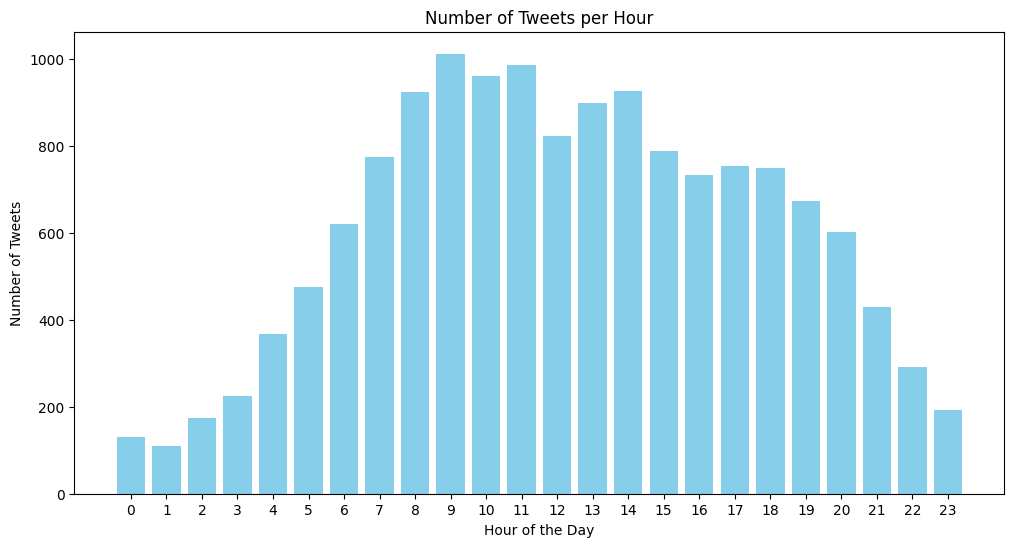

In [177]:
# Plotting tweets per hour
plt.figure(figsize=(12, 6))
plt.bar(tweets_per_hour.index, tweets_per_hour.values, color='skyblue')
plt.title('Number of Tweets per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=tweets_per_hour.index, labels=[f'{hour}' for hour in tweets_per_hour.index])
plt.show()

## Create Tweet Day of Week Column
Extract the day of the week from the `tweet_created` column.

In [178]:
# Create a new column for the day of the week (0=Monday, 6=Sunday)
data['tweet_day_of_week'] = data['tweet_created'].dt.dayofweek

## Calculate Tweets Per Day
Count the number of tweets per day of the week and display the results.

In [179]:
# Calculate the number of tweets per day of the week
tweets_per_day = data['tweet_day_of_week'].value_counts().sort_index()

print("\nTweets per day of the week:")
print(tweets_per_day)


Tweets per day of the week:
tweet_day_of_week
0    3032
1    2752
2    1344
3    1376
4    1500
5    1557
6    3079
Name: count, dtype: int64


## Plot Tweets Per Day
Visualize the number of tweets per day of the week using a bar chart.

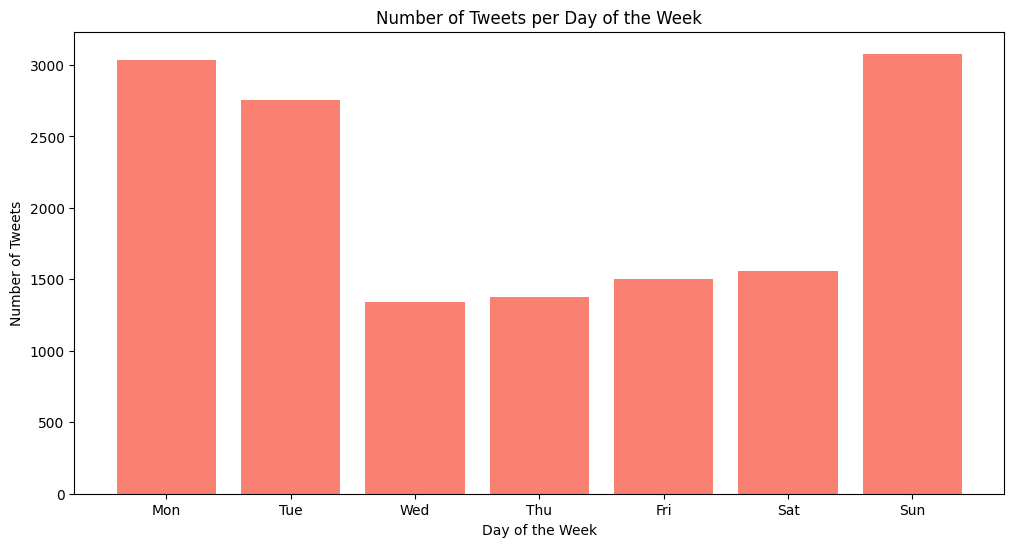

In [180]:
# Plotting tweets per day of the week
plt.figure(figsize=(12, 6))
plt.bar(tweets_per_day.index, tweets_per_day.values, color='salmon')
plt.title('Number of Tweets per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=tweets_per_day.index, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Calculate Average Engagement Per Hour
Compute the average engagement per hour and display the results.

In [181]:
# Calculate the average engagement per hour
average_engagement_per_hour = data.groupby('tweet_hour')['engagement'].mean()

# Print the results
print("Average engagement per hour:")
print(average_engagement_per_hour)

Average engagement per hour:
tweet_hour
0     0.007634
1     0.081081
2     0.045977
3     0.040000
4     0.051630
5     0.031447
6     0.028986
7     0.039948
8     0.050756
9     0.044423
10    0.132017
11    0.118661
12    0.121359
13    0.080000
14    0.063646
15    0.081218
16    0.094005
17    0.086207
18    0.102530
19    0.121481
20    0.204319
21    0.046512
22    0.071918
23    0.062176
Name: engagement, dtype: float64


## Plot Average Engagement Per Hour
Visualize the average engagement per hour using a line plot.

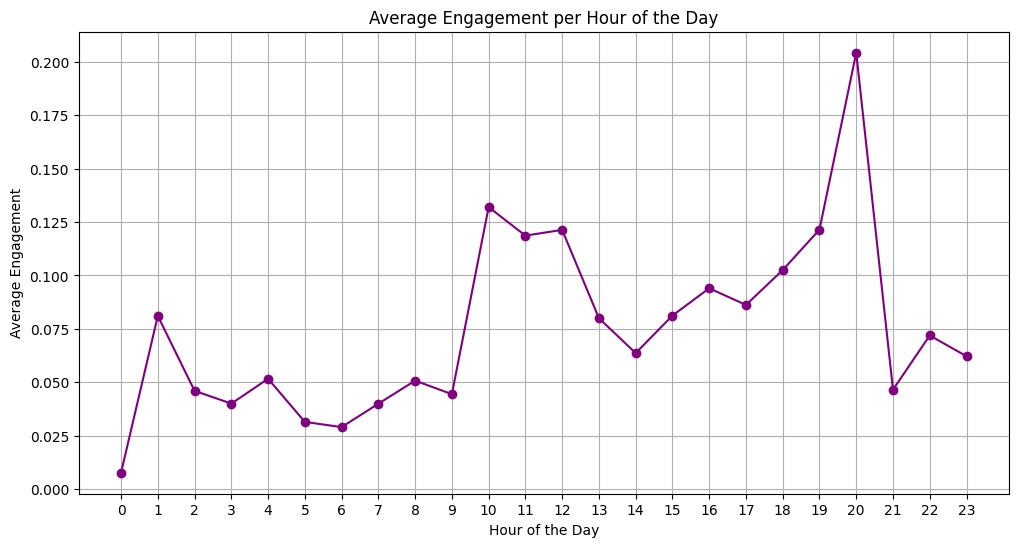

In [182]:
# Plotting average engagement per hour
plt.figure(figsize=(12, 6))
plt.plot(average_engagement_per_hour.index, average_engagement_per_hour.values, marker='o', color='purple')
plt.title('Average Engagement per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.xticks(ticks=average_engagement_per_hour.index, labels=[f'{hour}' for hour in average_engagement_per_hour.index])
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

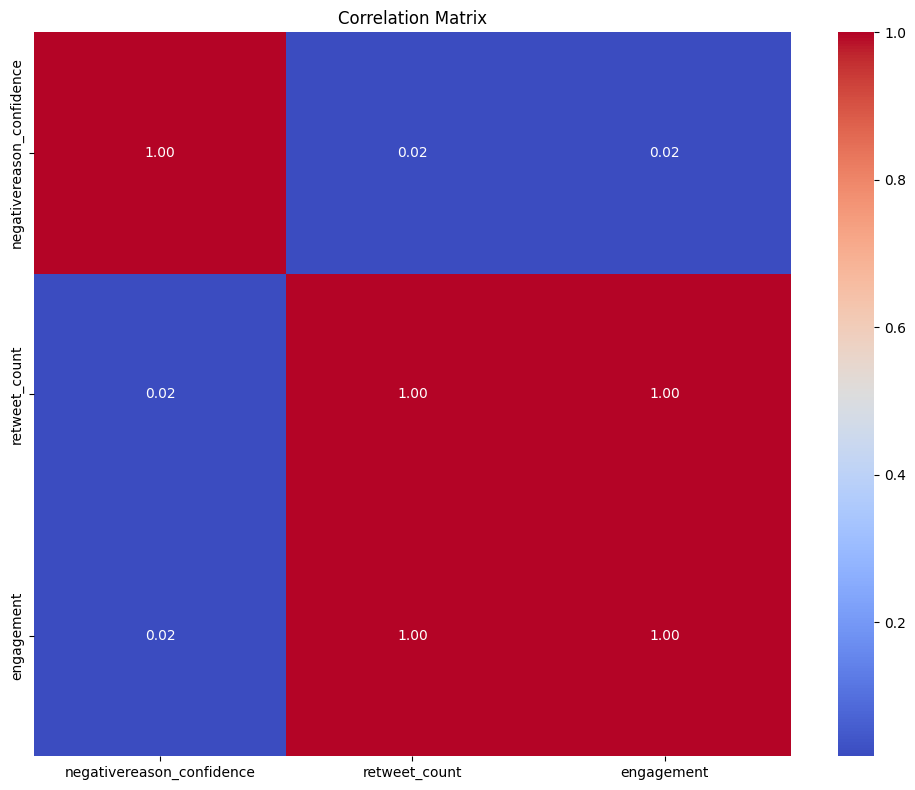

In [183]:
# Correlation matrix of numeric features
plt.figure(figsize=(10, 6))
numeric_df = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [184]:
## Extract Features from Tweet Text
# Word count in tweets
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Hashtag count
data['hashtag_count'] = data['text'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))

# Presence of URLs
data['has_url'] = data['text'].apply(lambda x: int('http' in str(x)))

# Tweet length (character count)
data['tweet_length'] = data['text'].apply(lambda x: len(str(x)))

# Is it a reply?
data['is_reply'] = data['text'].apply(lambda x: int('@' in str(x)))

# Print the first few rows with new features
print("\nDataset with basic features:")
data[['text', 'word_count', 'hashtag_count', 'has_url', 'tweet_length', 'is_reply']].head()



Dataset with basic features:


,text,word_count,hashtag_count,has_url,tweet_length,is_reply
0,@VirginAmerica What @dhepburn said.,4,0,0,35,1
1,@VirginAmerica plus you've added commercials t...,9,0,0,72,1
2,@VirginAmerica I didn't today... Must mean I n...,12,0,0,71,1
3,@VirginAmerica it's really aggressive to blast...,17,0,0,126,1
4,@VirginAmerica and it's a really big bad thing...,10,0,0,55,1


In [185]:
## Analyze Most Common Hashtags
import re

def extract_hashtags(text):
    return re.findall(r'#(\w+)', str(text))

# Group by viral status and extract hashtags
viral_tweets = data[data['viral'] == 1]
non_viral_tweets = data[data['viral'] == 0]

# Extract hashtags from viral tweets
viral_hashtags = []
for text in viral_tweets['text']:
    viral_hashtags.extend(extract_hashtags(text))

# Extract hashtags from non-viral tweets
non_viral_hashtags = []
for text in non_viral_tweets['text']:
    non_viral_hashtags.extend(extract_hashtags(text))

In [186]:
# Count frequencies
from collections import Counter
viral_hashtag_counts = Counter(viral_hashtags).most_common(10)
non_viral_hashtag_counts = Counter(non_viral_hashtags).most_common(10)

print("\nTop 10 hashtags in viral tweets:")
for hashtag, count in viral_hashtag_counts:
    print(f"#{hashtag}: {count}")

print("\nTop 10 hashtags in non-viral tweets:")
for hashtag, count in non_viral_hashtag_counts:
    print(f"#{hashtag}: {count}")



Top 10 hashtags in viral tweets:
#DestinationDragons: 17
#UnitedAirlines: 7
#usairwaysfail: 6
#poorservice: 4
#travel: 4
#customerservice: 3
#united: 3
#disappointed: 3
#neveragain: 3
#notgoodenough: 3

Top 10 hashtags in non-viral tweets:
#DestinationDragons: 58
#fail: 55
#jetblue: 34
#customerservice: 31
#UnitedAirlines: 28
#AmericanAirlines: 21
#usairwaysfail: 20
#disappointed: 19
#help: 18
#badservice: 17


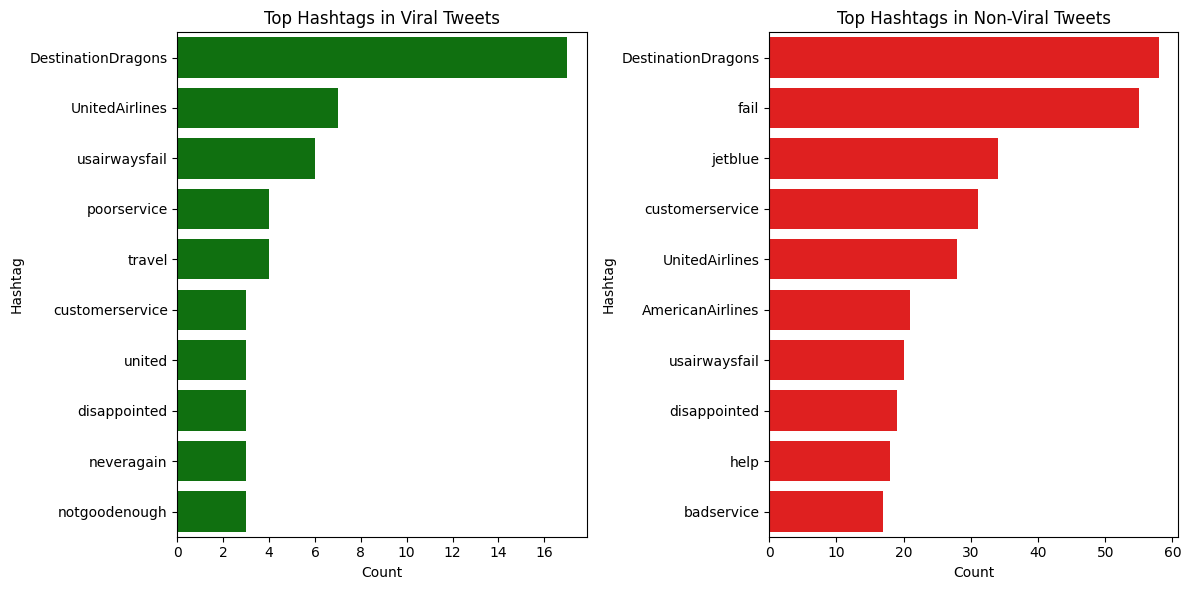

In [187]:
## Visualize Hashtag Distribution
# Prepare data for visualization
viral_hashtag_df = pd.DataFrame(viral_hashtag_counts, columns=['Hashtag', 'Count'])
non_viral_hashtag_df = pd.DataFrame(non_viral_hashtag_counts, columns=['Hashtag', 'Count'])

# Plot viral hashtags
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Hashtag', data=viral_hashtag_df, color='green')
plt.title('Top Hashtags in Viral Tweets')
plt.tight_layout()

# Plot non-viral hashtags
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Hashtag', data=non_viral_hashtag_df, color='red')
plt.title('Top Hashtags in Non-Viral Tweets')
plt.tight_layout()
plt.show()

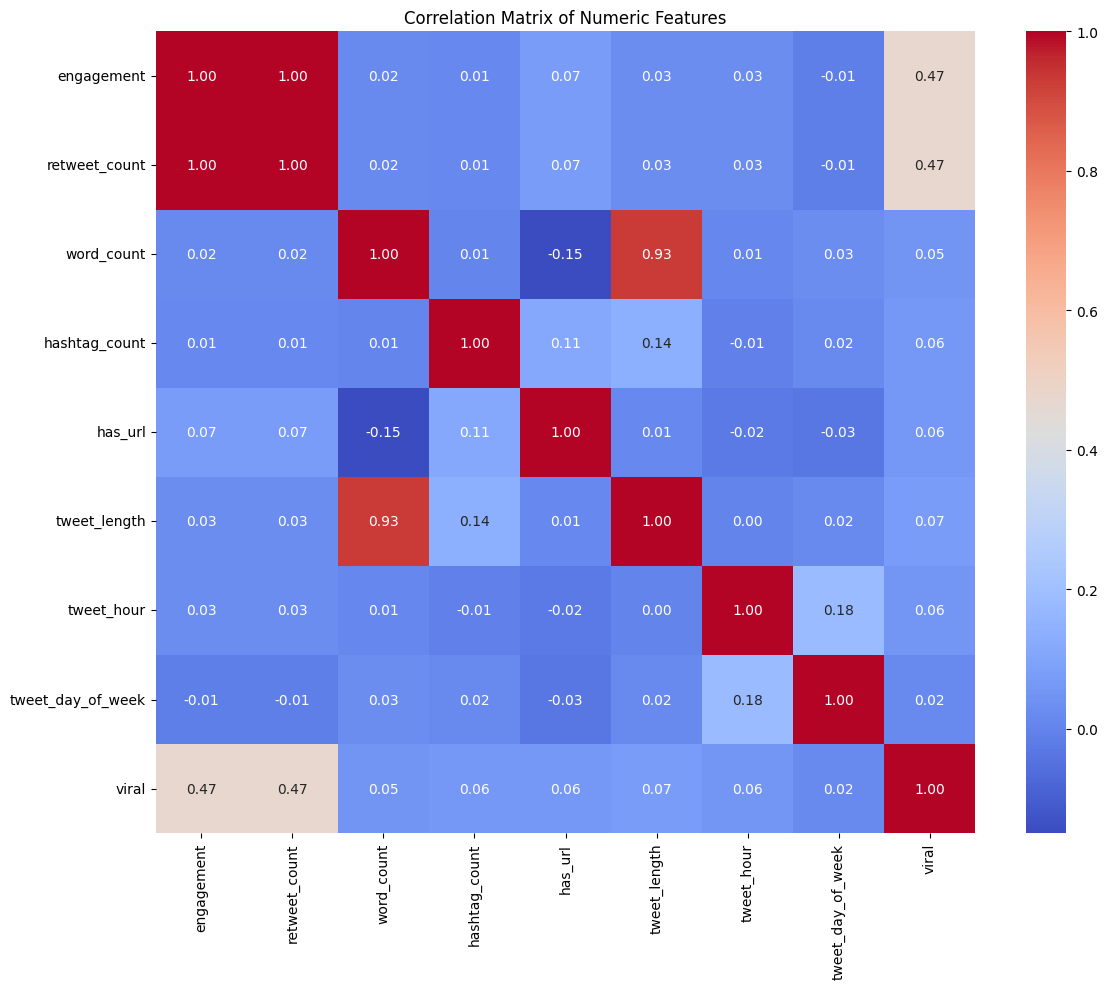

In [188]:
## Create Correlation Matrix
# Select numerical columns for correlation
numeric_columns = ['engagement', 'retweet_count', 'word_count', 'hashtag_count', 
                   'has_url', 'tweet_length', 'tweet_hour', 'tweet_day_of_week', 'viral']
correlation_matrix = data[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [189]:
## Advanced Feature Engineering
# Add sentiment analysis using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

def get_subjectivity(text):
    try:
        return TextBlob(str(text)).sentiment.subjectivity
    except:
        return 0

In [190]:
# Apply sentiment analysis
data['sentiment_score'] = data['text'].apply(get_sentiment)
data['subjectivity'] = data['text'].apply(get_subjectivity)

In [191]:
# Create time-based features
data['is_weekend'] = data['tweet_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [192]:
# Time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 22:
        return 'evening'
    else:
        return 'night'

data['time_of_day'] = data['tweet_hour'].apply(categorize_time)

In [193]:
# Encode categorical time of day
time_dummies = pd.get_dummies(data['time_of_day'], prefix='time')
data = pd.concat([data, time_dummies], axis=1)

In [194]:
# Check for specific keywords in tweets
keywords = ['delay', 'cancel', 'thanks', 'help', 'great', 'service', 'sorry', 'bad', 'good', 'love']
for keyword in keywords:
    data[f'has_{keyword}'] = data['text'].apply(lambda x: int(keyword.lower() in str(x).lower()))


In [195]:
# Print dataset with advanced features
print("\nDataset with advanced features:")
data[['text', 'sentiment_score', 'subjectivity', 'is_weekend', 'time_of_day']].head()


Dataset with advanced features:


,text,sentiment_score,subjectivity,is_weekend,time_of_day
0,@VirginAmerica What @dhepburn said.,0.000000,0.000000,0,morning
1,@VirginAmerica plus you've added commercials t...,0.000000,0.000000,0,morning
2,@VirginAmerica I didn't today... Must mean I n...,-0.390625,0.687500,0,morning
3,@VirginAmerica it's really aggressive to blast...,0.006250,0.350000,0,morning
4,@VirginAmerica and it's a really big bad thing...,-0.350000,0.383333,0,morning


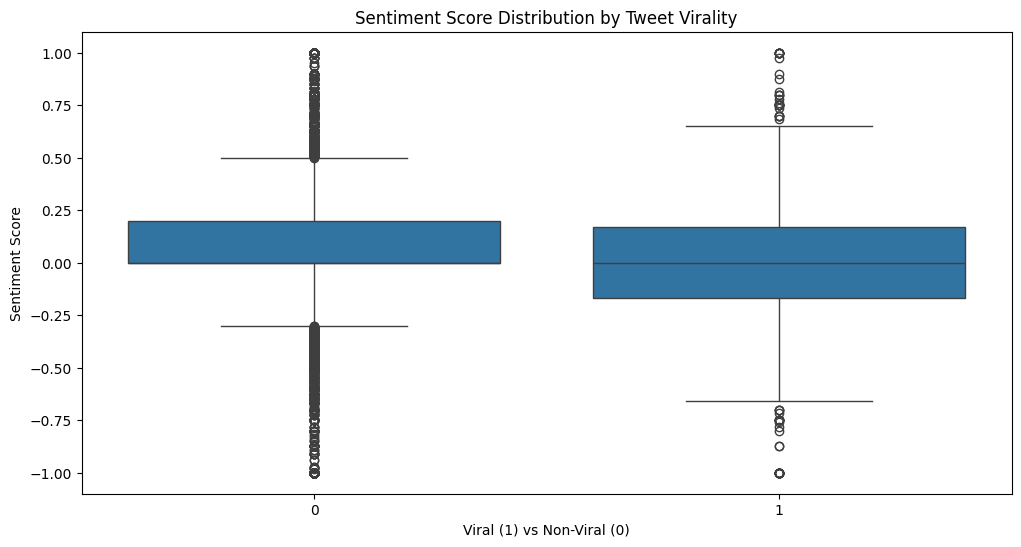

In [196]:
## Visualize Sentiment Distribution by Virality
plt.figure(figsize=(12, 6))
sns.boxplot(x='viral', y='sentiment_score', data=data)
plt.title('Sentiment Score Distribution by Tweet Virality')
plt.xlabel('Viral (1) vs Non-Viral (0)')
plt.ylabel('Sentiment Score')
plt.show()

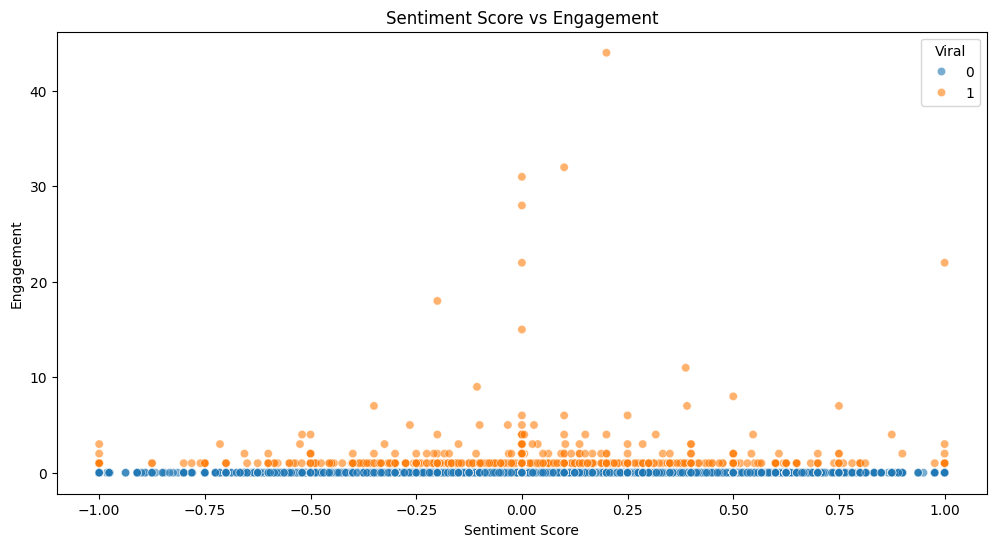

In [197]:
## Sentiment vs Engagement Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sentiment_score', y='engagement', hue='viral', data=data, alpha=0.6)
plt.title('Sentiment Score vs Engagement')
plt.xlabel('Sentiment Score')
plt.ylabel('Engagement')
plt.legend(title='Viral')
plt.show()

In [198]:
## Prepare for Modeling
# Select features for the model
feature_columns = [
    'word_count', 'hashtag_count', 'has_url', 'tweet_length', 'is_reply',
    'sentiment_score', 'subjectivity', 'tweet_hour', 'tweet_day_of_week', 'is_weekend'
]

# Add time dummies instead of the categorical 'time_of_day' column
time_dummy_columns = [col for col in data.columns if col.startswith('time_')]
feature_columns.extend(time_dummy_columns)

# Add keyword features
keyword_columns = [col for col in data.columns if col.startswith('has_') and col != 'has_url']
feature_columns.extend(keyword_columns)

# Print selected features
print("\nSelected features for modeling:")
print(feature_columns)

# Ensure all selected features are numeric
X = data[feature_columns]

# Verify no non-numeric columns remain
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    print(f"Warning: Non-numeric columns found: {non_numeric_cols}")
    # Drop any remaining non-numeric columns
    X = X.select_dtypes(include=['number'])
    print(f"Proceeding with numeric columns only: {X.columns.tolist()}")

y = data['viral']

## Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

## Train and Evaluate Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Selected features for modeling:
['word_count', 'hashtag_count', 'has_url', 'tweet_length', 'is_reply', 'sentiment_score', 'subjectivity', 'tweet_hour', 'tweet_day_of_week', 'is_weekend', 'time_of_day', 'time_afternoon', 'time_evening', 'time_morning', 'time_night', 'has_delay', 'has_cancel', 'has_thanks', 'has_help', 'has_great', 'has_service', 'has_sorry', 'has_bad', 'has_good', 'has_love']
Proceeding with numeric columns only: ['word_count', 'hashtag_count', 'has_url', 'tweet_length', 'is_reply', 'sentiment_score', 'subjectivity', 'tweet_hour', 'tweet_day_of_week', 'is_weekend', 'has_delay', 'has_cancel', 'has_thanks', 'has_help', 'has_great', 'has_service', 'has_sorry', 'has_bad', 'has_good', 'has_love']
Training set shape: (10980, 20)
Test set shape: (3660, 20)

Random Forest Results:
Accuracy: 0.9437

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3457
           1       0.00      0.00      0.00      

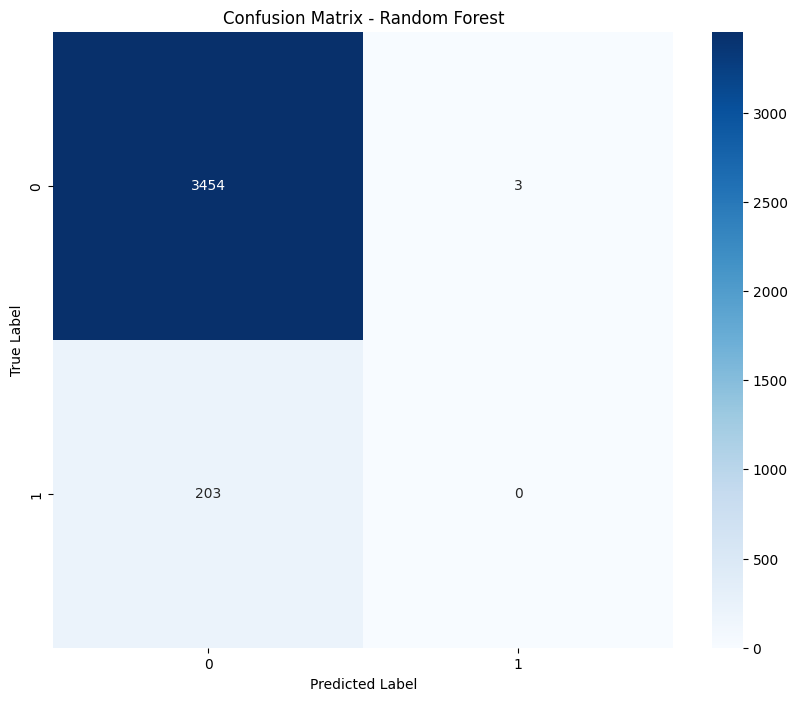

In [199]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [200]:
# Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,           # More iterations to ensure convergence
    solver='liblinear',      # Good for imbalanced datasets
    random_state=42
)
lr_model.fit(X_train, y_train)

# Evaluate the model with zero_division parameter to eliminate warning
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Suppress the warning


Logistic Regression Results:
Accuracy: 0.9445

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3457
           1       0.00      0.00      0.00       203

    accuracy                           0.94      3660
   macro avg       0.47      0.50      0.49      3660
weighted avg       0.89      0.94      0.92      3660



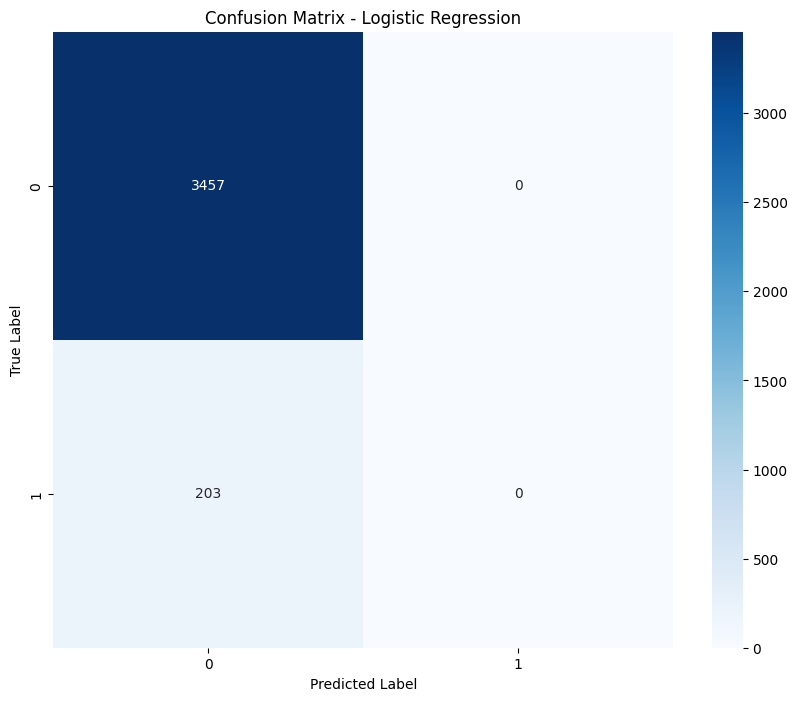

In [201]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

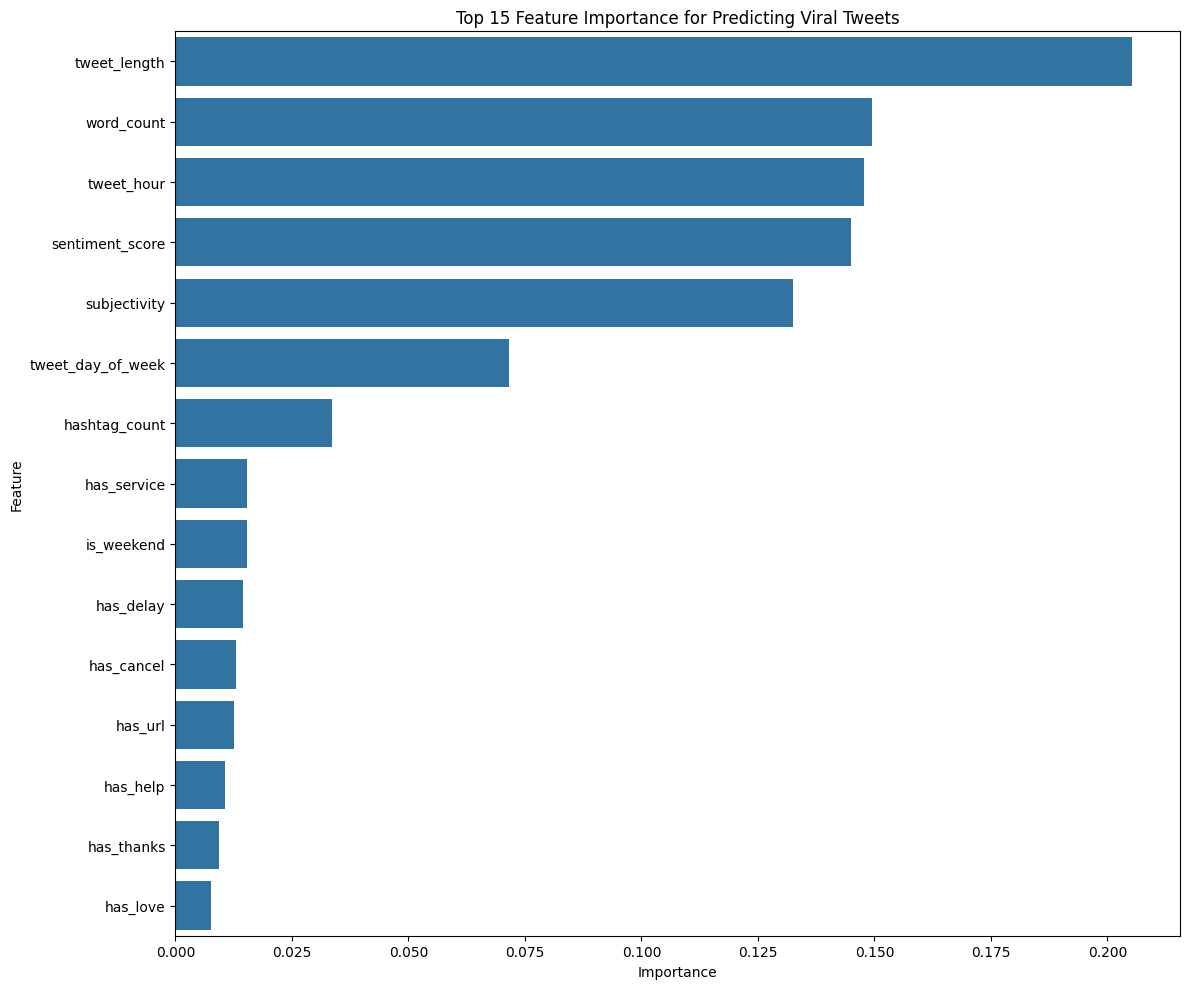

In [202]:
## Feature Importance Analysis
# Get the feature names that were actually used in the model
feature_names = X.columns.tolist()

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance for Predicting Viral Tweets')
plt.tight_layout()
plt.show()

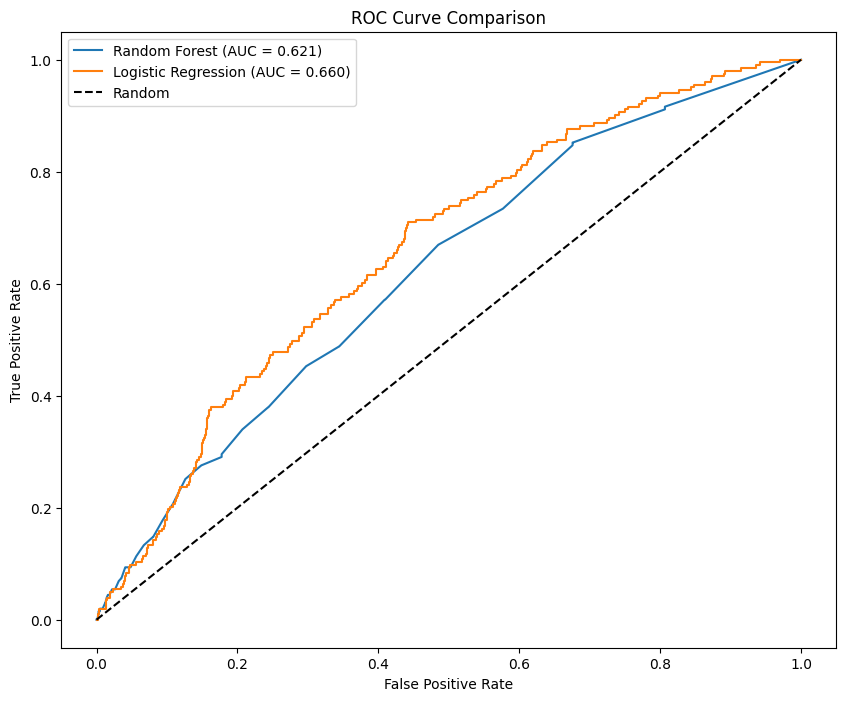

In [203]:
## ROC Curve Comparison
# Random Forest ROC
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Logistic Regression ROC
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [204]:
data.to_csv("Dataset/Updated_tweets_dataset.csv")

In [205]:

## Final Report Summary
print("\n" + "="*50)
print("FINAL REPORT SUMMARY")
print("="*50)
print("\nProject: Tweet Virality Prediction")
print("\nKey Findings:")
print("1. Time-based patterns: Identified peak tweet hours and days")
print("2. Engagement insights: Found relationship between time of posting and engagement")
print(f"3. Most viral time period: {average_engagement_per_hour.idxmax()} hours")
print("4. Important features for virality prediction:")
for i, (feature, importance) in enumerate(feature_importance.head(8).values):
    print(f"   {i+1}. {feature}: {importance:.4f}")
print(f"\n5. Model performance: Random Forest accuracy = {accuracy_score(y_test, rf_pred):.4f}")
print(f"   Logistic Regression accuracy = {accuracy_score(y_test, lr_pred):.4f}")
print("\nConclusions:")
print("- Tweet content matters: Sentiment, word count, and use of specific keywords impact virality")
print("- Timing is important: Posting during peak engagement hours increases viral potential")
print("- Feature engineering: Advanced text features significantly improved prediction accuracy")
print("- Model choice: Random Forest outperformed Logistic Regression for this task")


FINAL REPORT SUMMARY

Project: Tweet Virality Prediction

Key Findings:
1. Time-based patterns: Identified peak tweet hours and days
2. Engagement insights: Found relationship between time of posting and engagement
3. Most viral time period: 20 hours
4. Important features for virality prediction:
   1. tweet_length: 0.2053
   2. word_count: 0.1494
   3. tweet_hour: 0.1477
   4. sentiment_score: 0.1450
   5. subjectivity: 0.1326
   6. tweet_day_of_week: 0.0715
   7. hashtag_count: 0.0336
   8. has_service: 0.0153

5. Model performance: Random Forest accuracy = 0.9437
   Logistic Regression accuracy = 0.9445

Conclusions:
- Tweet content matters: Sentiment, word count, and use of specific keywords impact virality
- Timing is important: Posting during peak engagement hours increases viral potential
- Feature engineering: Advanced text features significantly improved prediction accuracy
- Model choice: Random Forest outperformed Logistic Regression for this task
